# Projeto: Data-Driven Insights

Este projeto tem como objetivo explorar, transformar e visualizar uma base de dados utilizando Python e bibliotecas como pandas, NumPy e Matplotlib.

A base escolhida contém registros de vendas com diversas informações: pedidos, produtos, preços, clientes e localizações.

Vamos analisar os dados e gerar insights relevantes para negócios.

---


# Importando bibliotecas e lendo arquivo
Utilizamos a base de dados de vendas e, para garantir a codificação correta das informações (acentos, moedas, datas, etc), utilizamos o encoding Latin-1 por ser comumente usado em idiomas da Europa  Ocidental

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

# Carregando Dados

Analisando os comandos podemos ver que temos 3 tipos principais de dados: *int64, float64, object*; que são, respectivamente: **int**, **float** e **string**.



In [ ]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Ooptamos pelo uso do *.info()* porque esse método retorna um resumo bem completo sobre a base de informações. Podemos analisar o índice, a quantidade de colunas, o tipo de cada dado, e mais.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# Estruturas de dados
Utilizamos as estruturas de dados mais famosas em Python para armazenar e acessar informações do banco de dados:

In [ ]:
#lista com todos os valores da coluna 'PRODUCTLINE'
lista_produtos = list(df['PRODUCTLINE'])
for produto in lista_produtos[:5]:
    print(produto)

print('\nLISTA DOS PRODUTOS SEM REPETIÇÃO:')
#utilizando a função set() para evitar produtos repetidos
lista_sem_repeticao =list(set(df['PRODUCTLINE']))
for produto in lista_sem_repeticao:
    print(produto)

print('-~'*30) #separador básico para visualizar melhor

#'PRODUCTLINE' como chave e 'CUSTOMERNAME' como valor
print('TELEFONE DE CADA CLIENTE')
dicionario = dict(zip(df['CUSTOMERNAME'], df['PHONE']))
for chave, valor in list(dicionario.items())[:3]:
    print(f'{chave}: {valor}')

print('-~'*30)

#CORRIGIR A PARTIR DAQUI:

# Tupla
linha0 = df.iloc[0]
minha_tupla = (linha0['PRODUCTLINE'], linha0['CUSTOMERNAME'], linha0['PRICEEACH'])
print(minha_tupla)

Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles

LISTA DOS PRODUTOS SEM REPETIÇÃO:
Trucks and Buses
Ships
Vintage Cars
Planes
Trains
Motorcycles
Classic Cars
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
TELEFONE DE CADA CLIENTE
Land of Toys Inc.: 2125557818
Reims Collectables: 26.47.1555
Lyon Souveniers: +33 1 46 62 7555
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
('Motorcycles', 'Land of Toys Inc.', np.float64(95.7))


Em Python, *zip()* é uma função integrada que combina elementos de duas ou mais sequências iteráveis em um objeto iterável de tuplas. É útil para iterar sobre múltiplas sequências em paralelo.

Estruturas Condicionais

In [ ]:
coluna_numerica = 'PRICEEACH'
valor = df[coluna_numerica][0]

# Condicional
if valor > 100:
    print("Valor alto")
elif valor > 50:
    print("Valor médio")
else:
    print("Valor baixo")

# Laço for – soma dos 5 primeiros preços
soma = 0
lista = list(df[coluna_numerica][:5])
for n in lista:
    soma += n
print("Soma dos 5 primeiros:", soma)

# Laço while – encontrar primeiro preço > 90
limite = 90
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor > 90 encontrado:", lista[i])

Valor médio
Soma dos 5 primeiros: 455.05
Primeiro valor > 90 encontrado: 95.7


Operações


In [ ]:
# Criar nova coluna com desconto de 10%
df['Desconto'] = df['PRICEEACH'] * 0.9
print(df[['PRICEEACH', 'Desconto']].head())


   PRICEEACH  Desconto
0      95.70    86.130
1      81.35    73.215
2      94.74    85.266
3      83.26    74.934
4     100.00    90.000


NumPy: arrays e op

In [ ]:
array = np.array(df['QUANTITYORDERED'])

print(array[:5])
print(array + 10)
print(array ** 2)
print("Soma:", array.sum())
print("Média:", array.mean())

[30 34 41 45 49]
[40 44 51 ... 53 44 57]
[ 900 1156 1681 ... 1849 1156 2209]
Soma: 99067
Média: 35.09280906836698


Pandas


In [ ]:
# Filtrar produtos com preço acima de 100
caros = df[df['PRICEEACH'] > 100]
print(caros[['PRODUCTLINE', 'PRICEEACH']])

# Agrupar vendas por linha de produto
grupo = df.groupby('PRODUCTLINE')['SALES'].sum()
print(grupo)

Empty DataFrame
Columns: [PRODUCTLINE, PRICEEACH]
Index: []
PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64


# 📊 Gráficos

---

### Gráfico de barras

Utilizamos o gráfico de barras para comparar o total de vendas por categoria de produto e percebemos que algumas linhas são significativamente mais lucrativas do que outras. A categoria com maior receita, provavelmente relacionada a itens de alto valor agregado ou com maior volume de vendas, representa uma oportunidade de investimento e foco comercial. Por outro lado, o segundo gráfico mostra as 10 cidades com maior quantidade de vendas, revelando onde há maior volume de pedidos. Isso indica alta demanda nessas regiões, o que pode orientar decisões sobre estoque, logística e marketing.

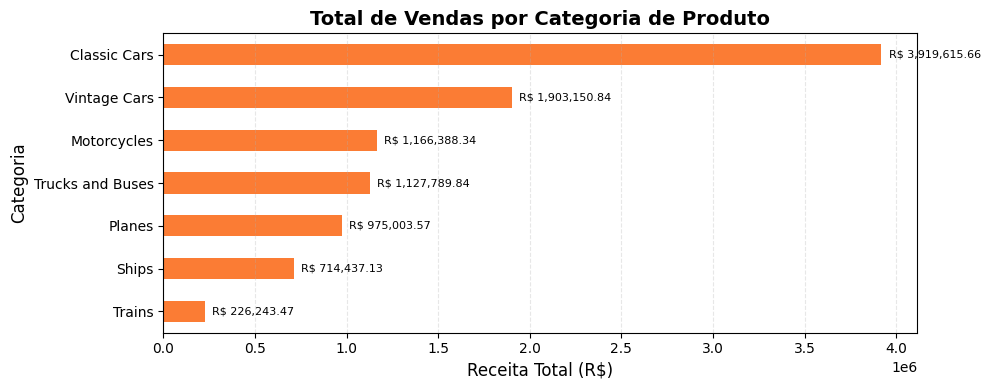

In [ ]:
#ordenando os dados de forma decrescente
vendas = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=True)

#criação de barras horizontal
plt.figure(figsize=(10,4))
ax = vendas.plot(kind='barh', color='#fb7c34')  #laranja

#adicionando as legendas
for posicao, valor in enumerate(vendas):
    ax.text(valor + vendas.max()*0.01, posicao, f'R$ {valor:,.2f}', va='center', fontsize=8, color='black')

#títulos e eixos
plt.title('Total de Vendas por Categoria de Produto', fontsize=14, fontweight='bold')
plt.xlabel('Receita Total (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)

#detalhes do fundo
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

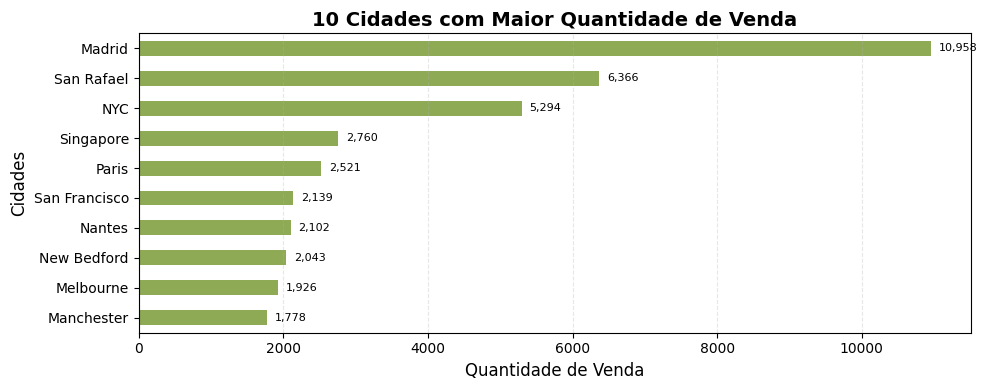

In [ ]:
#ordenando os dados de forma crescente
vendas = df.groupby('CITY')['QUANTITYORDERED'].sum().sort_values(ascending=True)

# Selecionar as 10 primeiras cidades com maiores vendas
top_10_cidades = vendas.tail(10)

#criação de barras horizontal
plt.figure(figsize=(10,4))
ax = top_10_cidades.plot(kind='barh', color='#8eaa55')

#adicionando as legendas
for posicao, valor in enumerate(top_10_cidades):
    ax.text(valor + top_10_cidades.max()*0.01, posicao, f'{valor:,.0f}', va='center', fontsize=8, color='black')


#títulos e eixos
plt.title('10 Cidades com Maior Quantidade de Venda', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Venda', fontsize=12)
plt.ylabel('Cidades', fontsize=12)


#detalhes do fundo
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Gráfico de linha
Utilizando um gráfico de linha para cada ano registrado na base de dados pudemos observar uma variação significativa nas vendas ao longo dos meses. Houve picos notáveis de faturamento em determinados períodos do ano, indicando possíveis sazonalidades ou campanhas promocionais de sucesso. Essa tendência pode ser explorada para planejar ações comerciais mais estratégicas em meses de maior retorno.

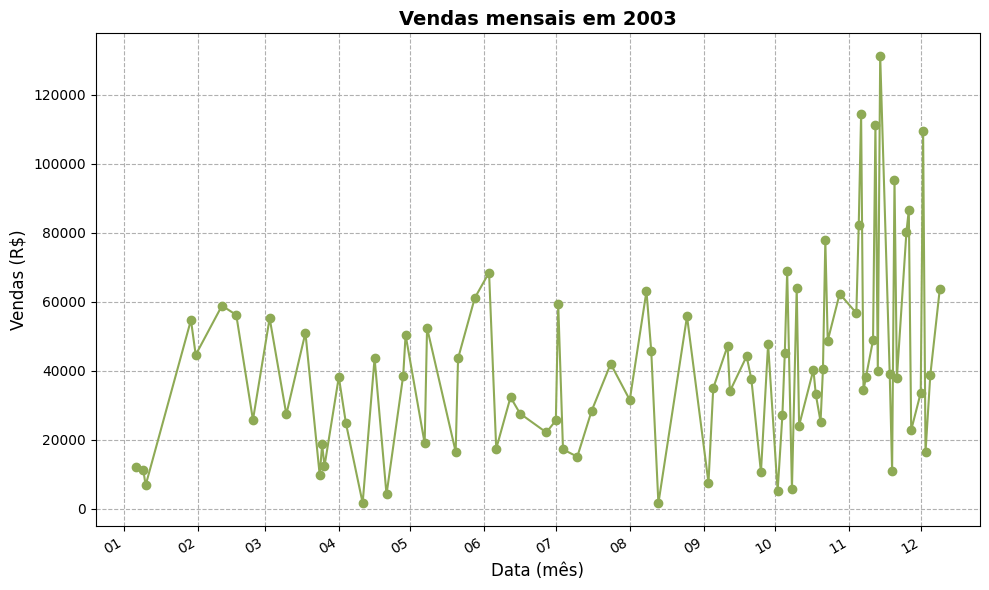

In [ ]:
#filtro do ano de 2003
df_2003 = df[df['YEAR_ID'] == 2003].copy()
df_2003['ORDERDATE'] = pd.to_datetime(df_2003['ORDERDATE'], errors='coerce') #evitando erros
vendas_2003 = df_2003.groupby(df_2003['ORDERDATE'])['SALES'].sum() #somando vendas

#criação do grafico
plt.figure(figsize=(10, 6))
vendas_2003.plot(kind='line', color='#8eaa55', marker='o')

#formatando os rótulos do eixo X para mostrar apenas o mês
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator()) #resultados mes a mes

#títulos e eixos
plt.title('Vendas mensais em 2003', fontsize=14, fontweight='bold')
plt.xlabel('Data (mês)', fontsize=12)
plt.ylabel('Vendas (R$)', fontsize=12)

#detalhes do fundo
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

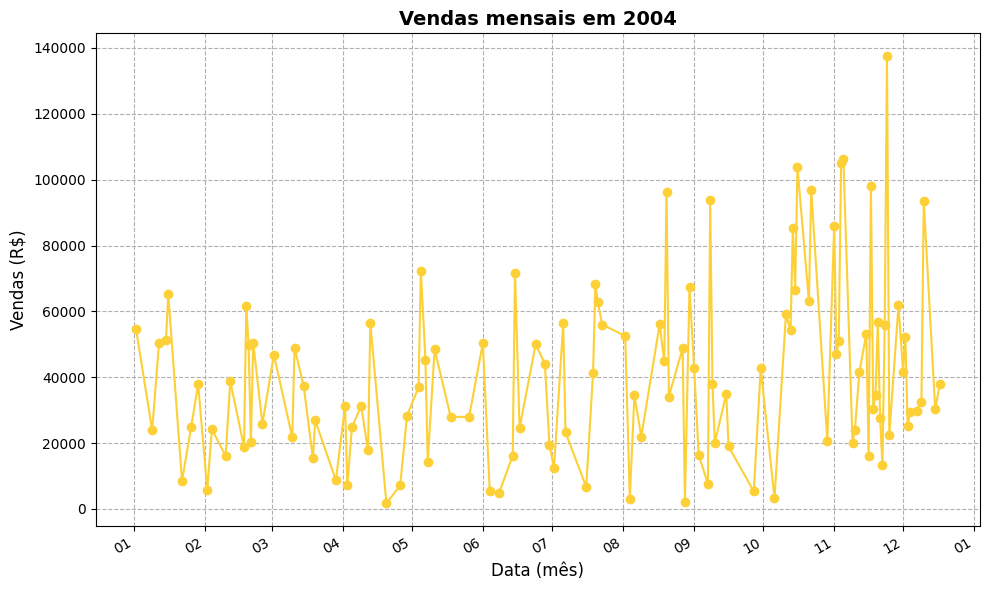

In [ ]:
#filtro do ano de 2004
df_2004 = df[df['YEAR_ID'] == 2004].copy()
df_2004['ORDERDATE'] = pd.to_datetime(df_2004['ORDERDATE'], errors='coerce')
vendas_2004 = df_2004.groupby(df_2004['ORDERDATE'])['SALES'].sum()

#criação do grafico
plt.figure(figsize=(10, 6))
vendas_2004.plot(kind='line', color='#fcd036', marker='o')

#formatando os rótulos do eixo X para mostrar apenas o mês
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

#títulos e eixos
plt.title('Vendas mensais em 2004', fontsize=14, fontweight='bold')
plt.xlabel('Data (mês)', fontsize=12)
plt.ylabel('Vendas (R$)', fontsize=12)

#detalhes do fundo
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

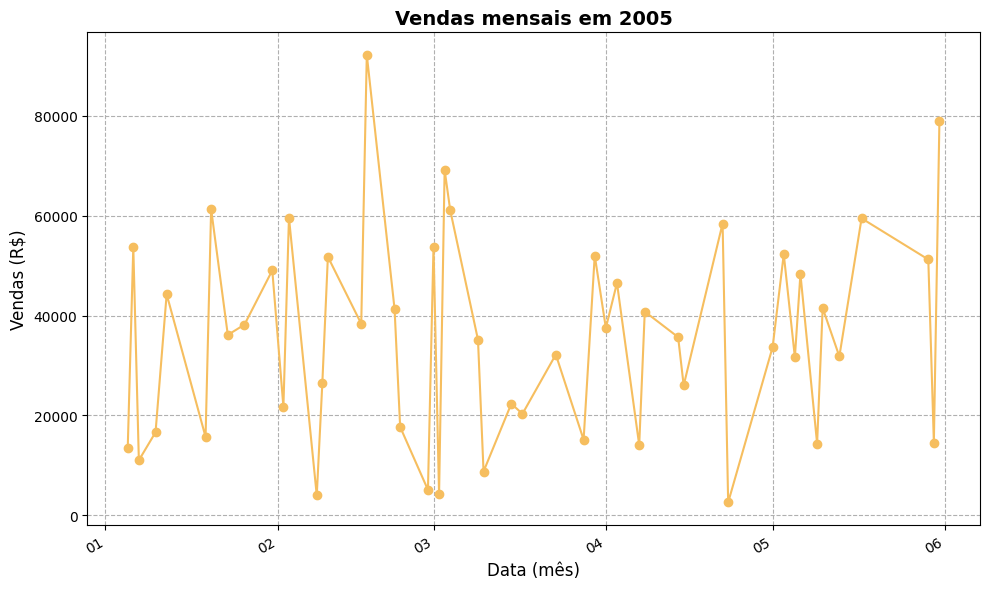

In [ ]:
#filtro do ano de 2005
df_2005 = df[df['YEAR_ID'] == 2005].copy()
df_2005['ORDERDATE'] = pd.to_datetime(df_2005['ORDERDATE'], errors='coerce')
vendas_2005 = df_2005.groupby(df_2005['ORDERDATE'])['SALES'].sum()

#criação do grafico
plt.figure(figsize=(10, 6))
vendas_2005.plot(kind='line', color='#f6be5f', marker='o')

#formatando os rótulos do eixo X para mostrar apenas o mês
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

#títulos e eixos
plt.title('Vendas mensais em 2005', fontsize=14, fontweight='bold')
plt.xlabel('Data (mês)', fontsize=12)
plt.ylabel('Vendas (R$)', fontsize=12)

#detalhes do fundo
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

### Grafico de dispersão

Atráves do gráfico de dispersão pudemos notar que pedidos de clientes de grande porte tendem a gerar maior valor de venda, mesmo com quantidades variadas. Já os clientes pequenos raramente alcançam altos valores totais, mesmo quando fazem pedidos grandes. Isso sugere que o tipo de cliente é um fator importante para estratégias comerciais.

In [ ]:
import pandas as pd

# Lê o arquivo que já está no Colab
df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')

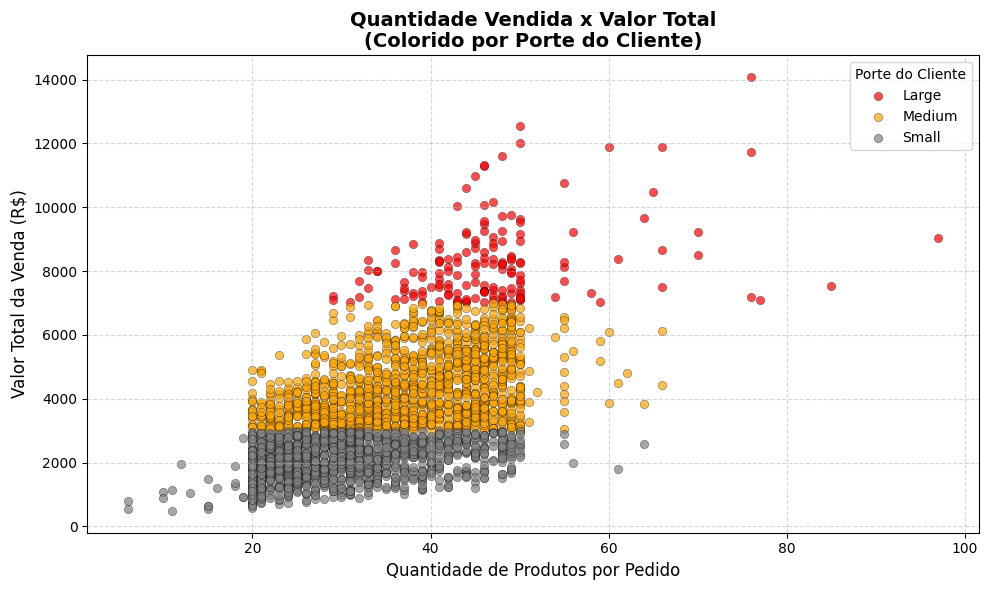

In [ ]:
import matplotlib.pyplot as plt

# Paleta personalizada com cores fixas para cada categoria
cores = {
    'Large': 'red',
    'Medium': 'orange',
    'Small': 'gray'
}

plt.figure(figsize=(10, 6))

# Plotar cada grupo com sua cor fixa
for porte, cor in cores.items():
    grupo = df[df['DEALSIZE'] == porte]
    plt.scatter(
        grupo['QUANTITYORDERED'],
        grupo['SALES'],
        color=cor,
        label=porte,
        alpha=0.7,
        edgecolors='black',
        linewidths=0.3
    )

# Título e eixos
plt.title('Quantidade Vendida x Valor Total\n(Colorido por Porte do Cliente)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Produtos por Pedido', fontsize=12)
plt.ylabel('Valor Total da Venda (R$)', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)

# Legenda correta automaticamente
plt.legend(title='Porte do Cliente')
plt.tight_layout()
plt.show()

## Relatório Final – Principais Aprendizados e Descobertas

Durante a análise da base `sales_data_sample.csv` com 2823 linhas e 25 colunas, foram realizadas diversas operações e visualizações:

- Listamos categorias de produtos, clientes e vendas por tipo.
- Utilizamos listas, dicionários e tuplas para estruturar informações.
- Aplicamos condições e laços (`if`, `for`, `while`) para entender padrões nos dados.
- Manipulamos colunas com pandas e criamos novas variáveis como "Desconto".
- Com NumPy, exploramos operações vetorizadas para somar, multiplicar e analisar séries numéricas.
- Utilizamos `groupby` e `value_counts()` para resumos por categoria e cidade.
- Criamos 3 tipos de gráficos:
  - 📈 Linha: para evolução temporal das vendas
  - 📊 Barras: para vendas por categoria e por cidade
  - ⚪ Dispersão: para entender relação entre quantidade e preço/venda

### Insights:
- As categorias com maior volume de vendas foram *Classic Cars* e *Motorcycles*.
- Cidades como *Madrid*, *Paris* e *San Francisco* lideraram em quantidade vendida.
- Clientes de porte *Large* tendem a gerar vendas com maior valor total.
- O volume de vendas não está diretamente proporcional ao preço unitário — produtos baratos também geram grandes volumes.
- A maioria das vendas ocorre com quantidade média entre 20 e 50 produtos por pedido.

---

Este projeto demonstrou como aplicar fundamentos de Python e análise de dados para gerar relatórios claros e visuais, auxiliando em decisões comerciais.
